In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
from scipy.stats import boxcox

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SHAI_Week-7-Diamond project/diamond-price-prediciton-2024/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SHAI_Week-7-Diamond project/diamond-price-prediciton-2024/test.csv")
df.drop(columns=["Id"],inplace=True)
# df_test.drop(columns=["Id"],inplace=True)

# **EDA (Exploratory Data Analysis)**

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [ ]:
df["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
df["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [ ]:
df.nunique()

carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.shape

(43152, 10)

In [ ]:
df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

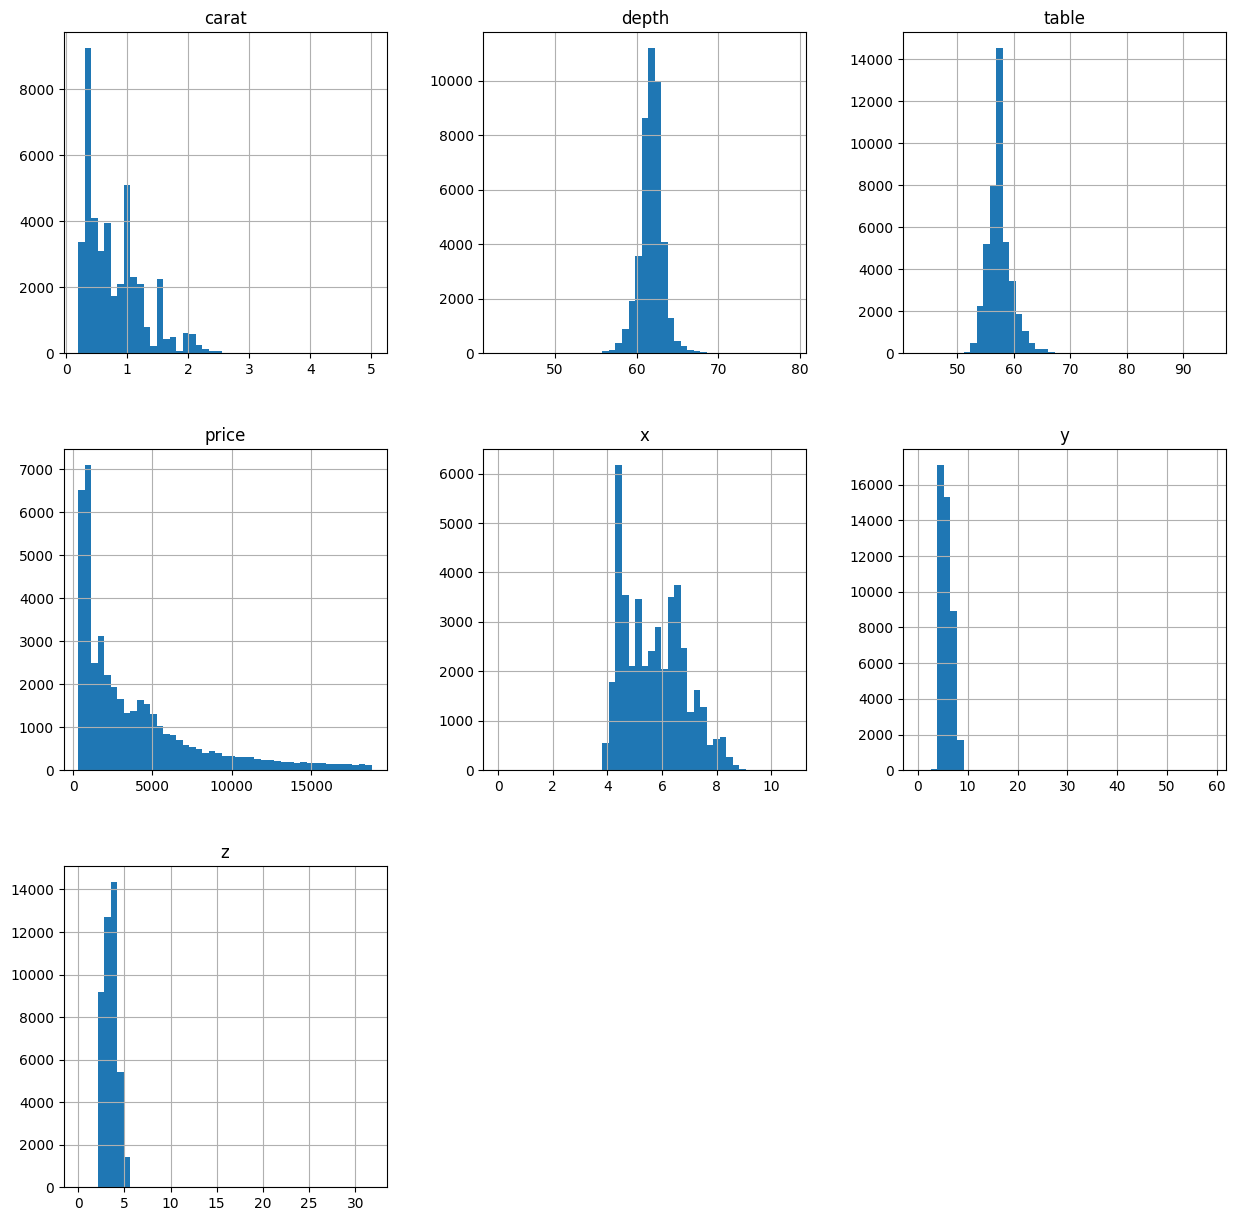

In [ ]:
df.hist(bins=45,figsize=(15, 15))

In [ ]:
df['carat']=np.log1p(df["carat"])


In [ ]:
df['z']=np.log1p(df["z"])


In [ ]:
df['y']=np.log1p(df["y"])

In [ ]:
df['x']=np.log1p(df["x"])


In [ ]:
df['depth']=np.log1p(df['depth'])

In [ ]:
df['table']=np.log1p(df['table'])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

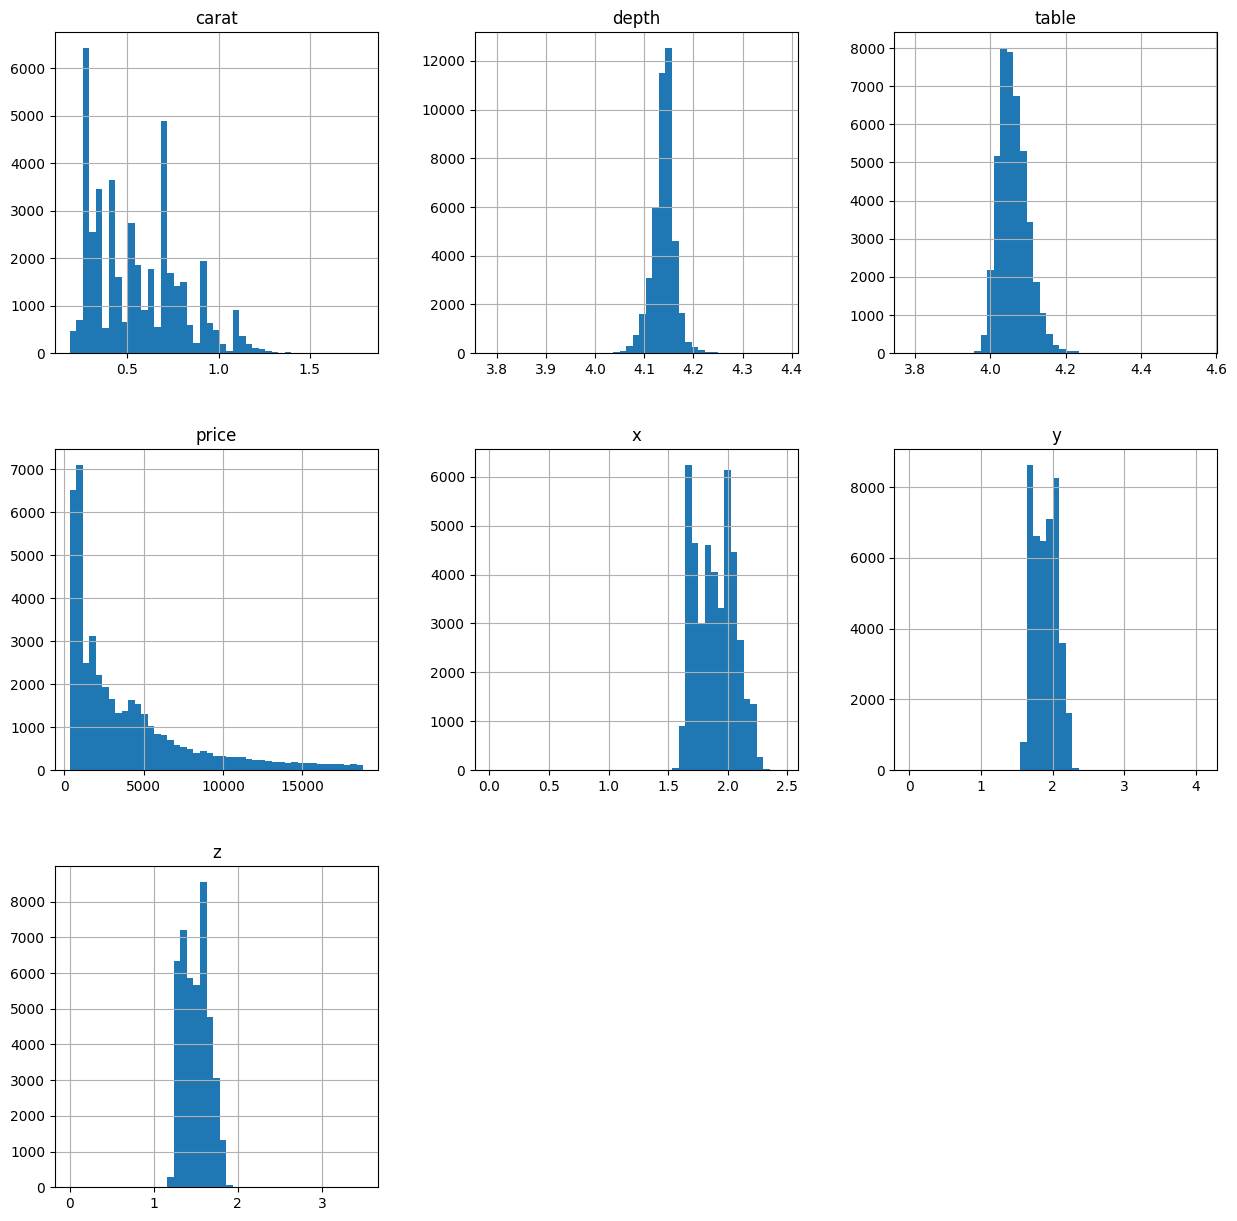

In [ ]:
df.hist(bins=45,figsize=(15, 15))

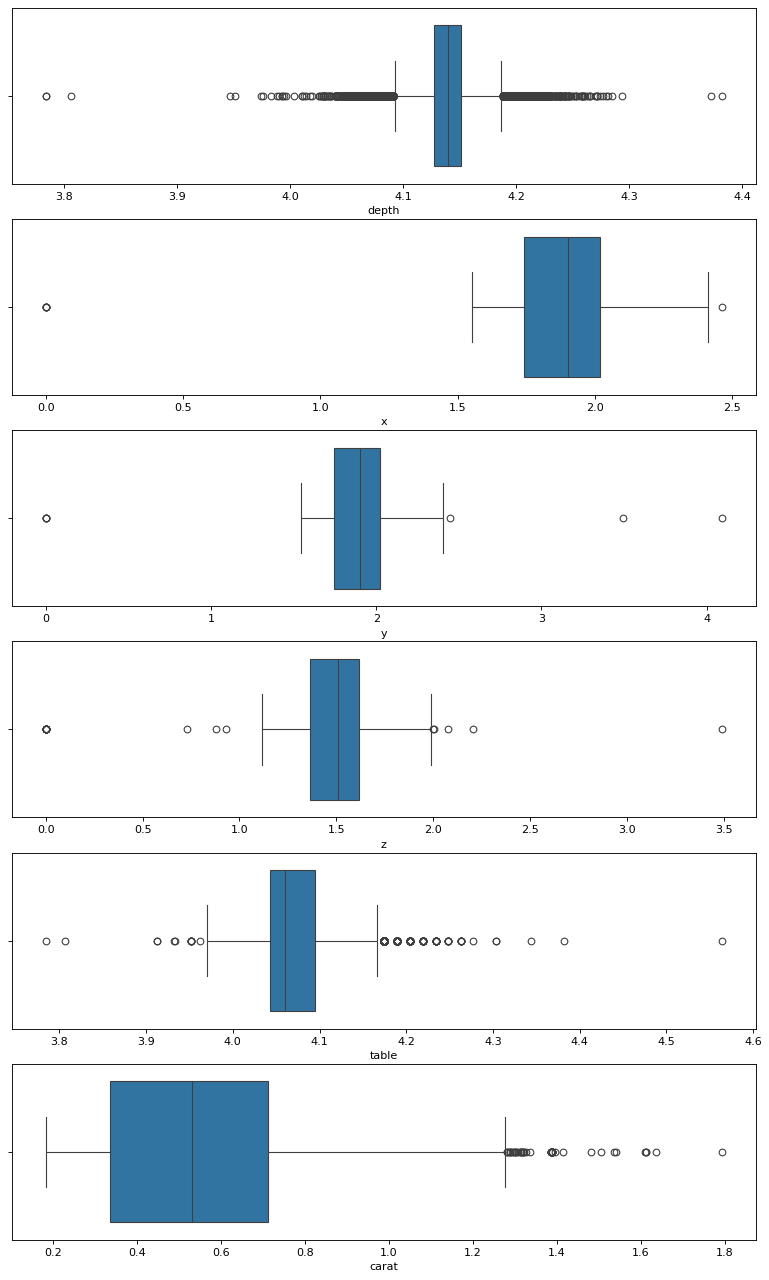

In [ ]:
fig, axis = plt.subplots(6, figsize=(12,20), dpi=80)
x = df[['depth','x','y','z','table','carat']]

for i, column in enumerate(x):
    sns.boxplot(x=df[column], ax=axis[i])

In [ ]:
num=df.select_dtypes(include='number')
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = num[((num < lower_bound) | (num > upper_bound)).any(axis=1)]
clean_df = num[~((num < lower_bound) | (num > upper_bound)).any(axis=1)]

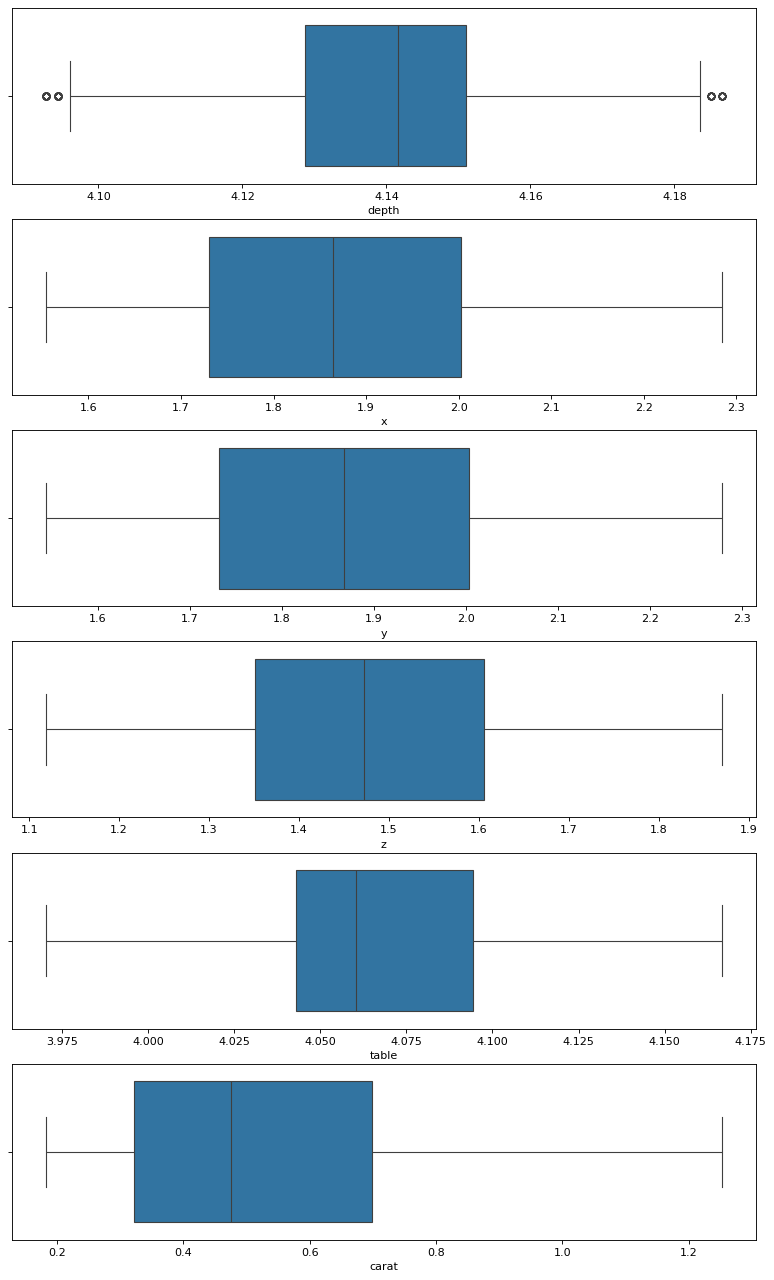

In [ ]:
fig, axis = plt.subplots(6, figsize=(12,20), dpi=80)
x = clean_df[['depth','x','y','z','table','carat']]

for i, column in enumerate(x):
    sns.boxplot(x=clean_df[column], ax=axis[i])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'volume'}>, <Axes: >]], dtype=object)

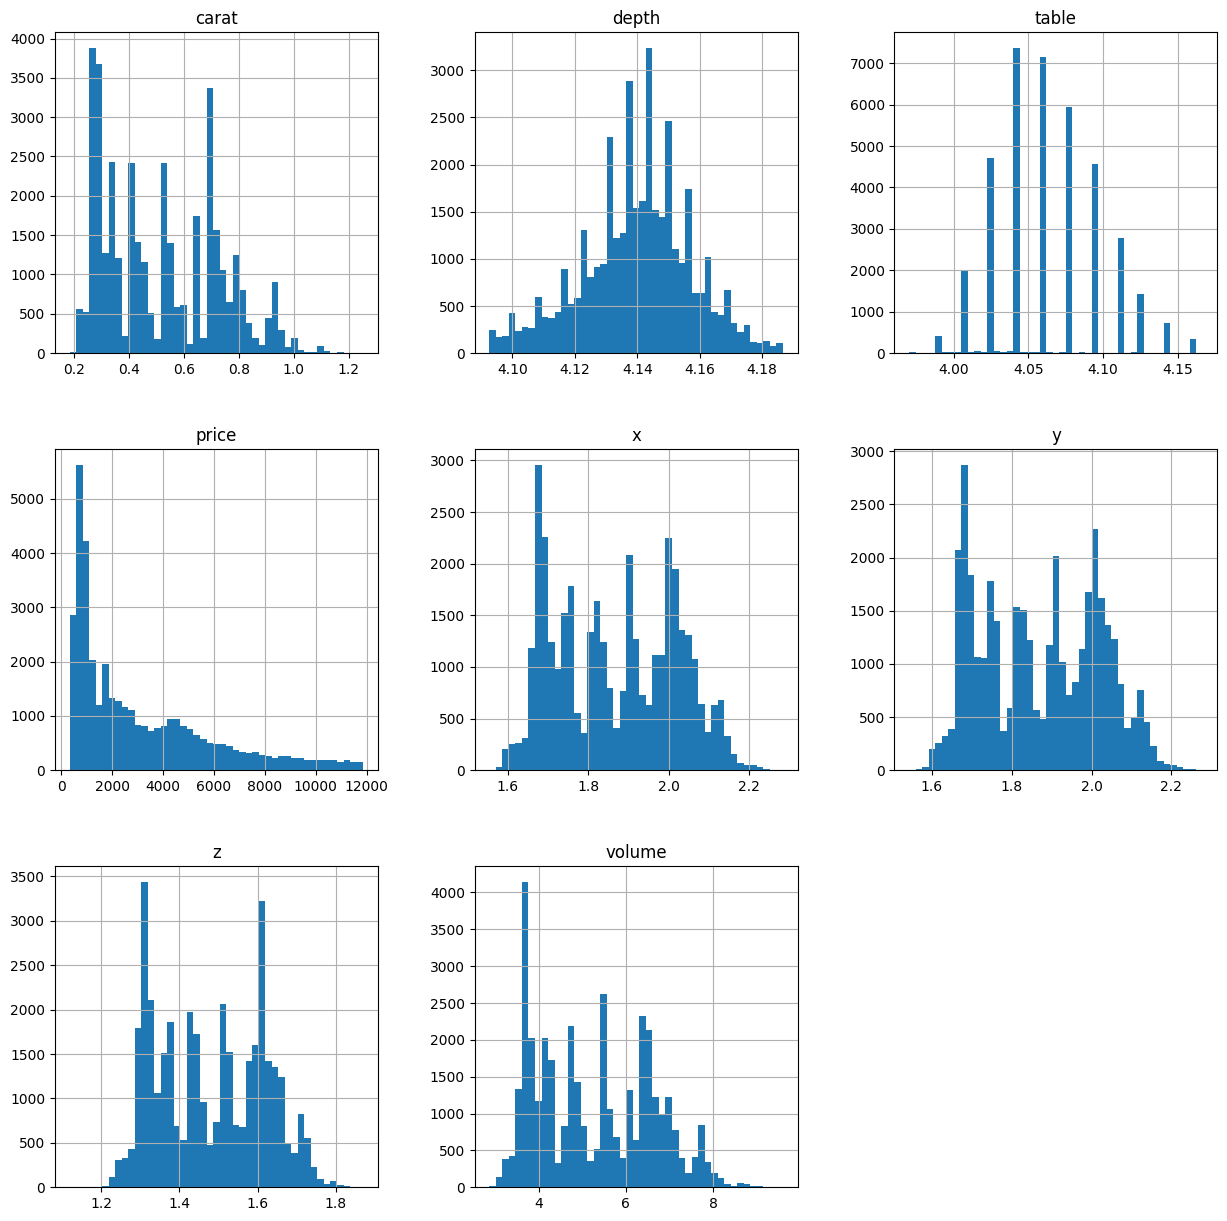

In [ ]:
clean_df.hist(bins=45,figsize=(15, 15))

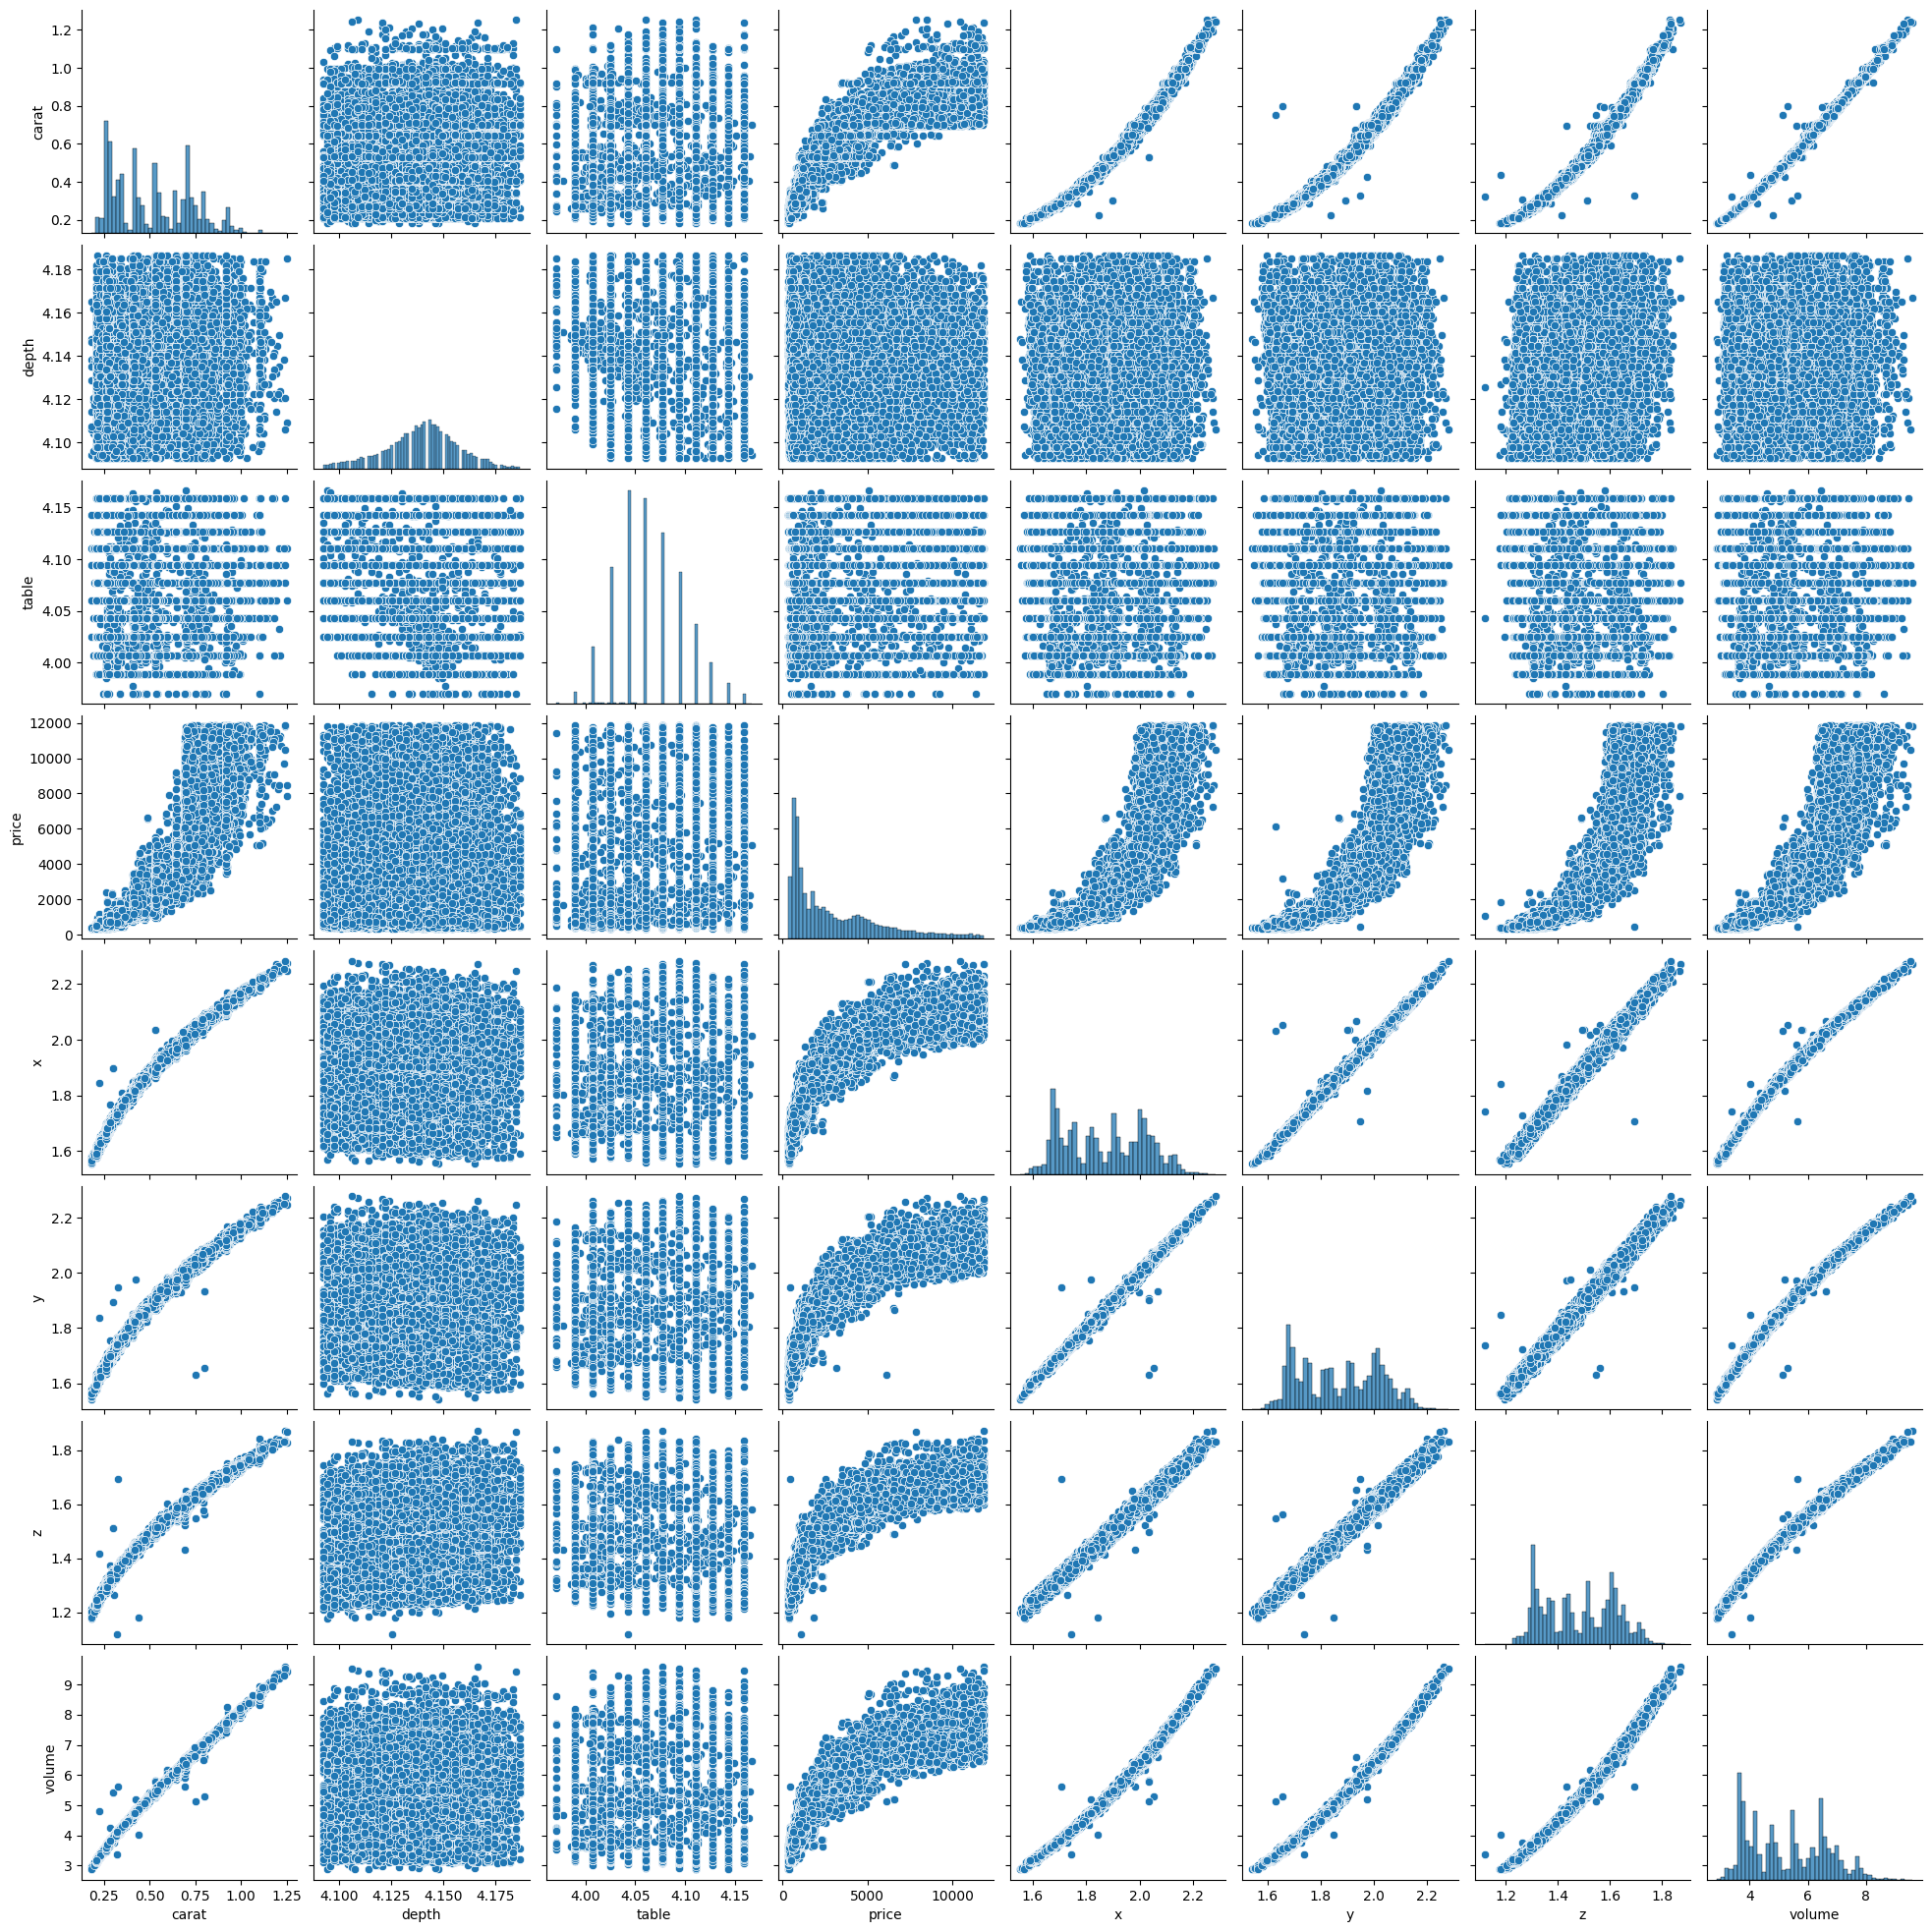

In [ ]:
sns.pairplot(clean_df)

In [ ]:
clean_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.038964,0.192340,0.912157,0.990380,0.989704,0.990623
depth,0.038964,1.000000,-0.236423,0.006926,-0.006706,-0.008197,0.092912
table,0.192340,-0.236423,1.000000,0.140992,0.188433,0.182587,0.161374
price,0.912157,0.006926,0.140992,1.000000,0.884507,0.885461,0.883566
x,0.990380,-0.006706,0.188433,0.884507,1.000000,0.998557,0.994454
y,0.989704,-0.008197,0.182587,0.885461,0.998557,1.000000,0.994258
z,0.990623,0.092912,0.161374,0.883566,0.994454,0.994258,1.000000


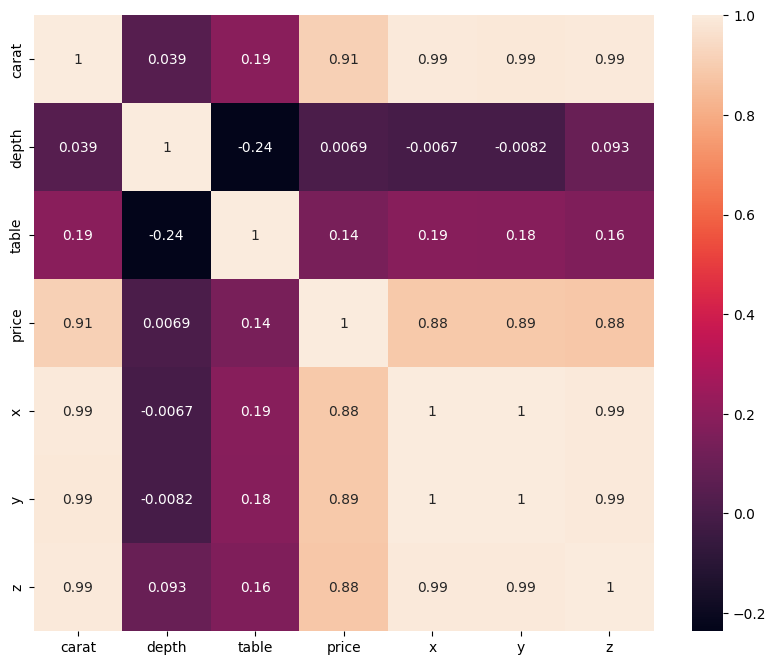

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(),annot=True)
plt.show()

In [ ]:
clean_df.loc[:, 'volume'] = clean_df['x'] * clean_df['y'] * clean_df['z']


In [ ]:
clean_df.head()

,carat,depth,table,price,x,y,z,volume
0,0.722706,4.139955,4.060443,4270,2.024193,2.028148,1.623341,6.664404
2,0.277632,4.131961,4.043051,828,1.691939,1.688249,1.311032,3.744851
3,0.425268,4.130355,4.043051,1577,1.822935,1.827770,1.432701,4.773624
4,0.530628,4.127134,4.060443,2596,1.911023,1.905088,1.504077,5.475845
5,0.641854,4.160444,4.077537,5670,1.971299,1.958685,1.583094,6.112571


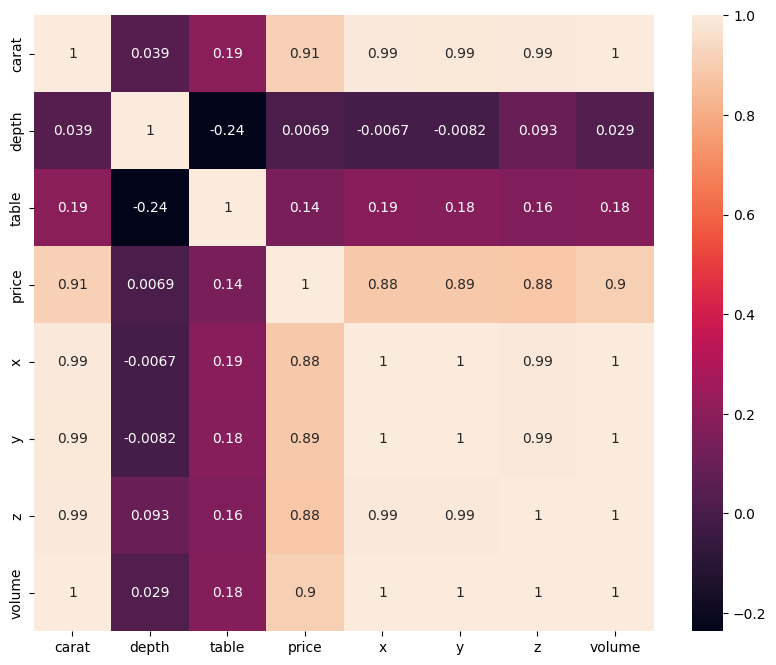

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(),annot=True)
plt.show()

In [ ]:
clean_df.describe()

,carat,depth,table,price,x,y,z,volume
count,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000
mean,0.514950,4.139823,4.064267,3124.220693,1.868631,1.869451,1.479667,5.278534
std,0.211244,0.017506,0.034487,2766.281616,0.150055,0.149077,0.137166,1.323997
min,0.182322,4.092677,3.970292,326.000000,1.553925,1.543298,1.118415,2.870485
25%,0.322083,4.128746,4.043051,891.000000,1.729884,1.731656,1.350667,4.046479
50%,0.476234,4.141546,4.060443,2067.500000,1.864080,1.867176,1.472472,5.113002
75%,0.698135,4.151040,4.094345,4645.250000,2.002830,2.002830,1.605430,6.442018
max,1.252763,4.186620,4.166665,11856.000000,2.284421,2.278292,1.870263,9.602436


<Axes: xlabel='volume', ylabel='price'>

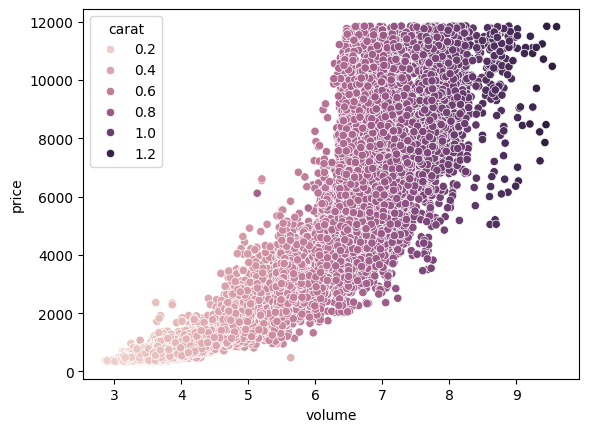

In [ ]:
sns.scatterplot(x=clean_df['volume'],y=clean_df['price'],hue=clean_df['carat'])

In [ ]:
clean_df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'volume'], dtype='object')

<ipython-input-197-eac3ba637b6a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["cut"], palette='rocket')


<Axes: xlabel='count', ylabel='cut'>

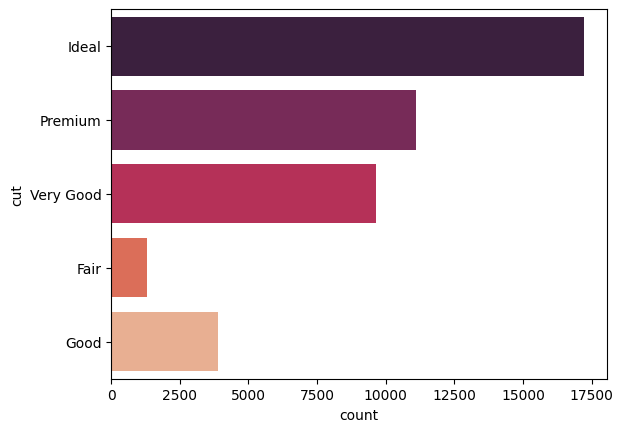

In [ ]:
sns.countplot(df["cut"], palette='rocket')

In [ ]:
df["cut"].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

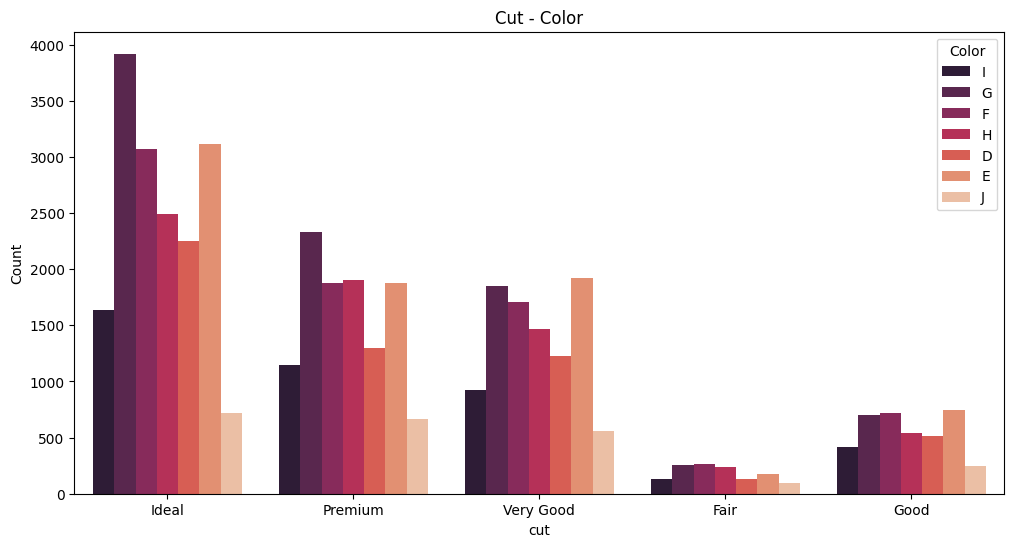

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cut', hue='color', palette='rocket')
plt.xlabel('cut')
plt.ylabel('Count')
plt.title('Cut - Color')
plt.legend(title='Color')
plt.show()

<ipython-input-200-2463b4fd66cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["clarity"], palette='rocket')


<Axes: xlabel='count', ylabel='clarity'>

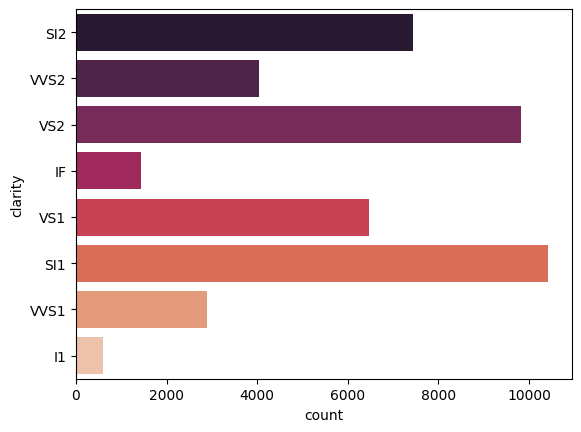

In [ ]:
sns.countplot(df["clarity"], palette='rocket')

In [ ]:
df["clarity"].value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

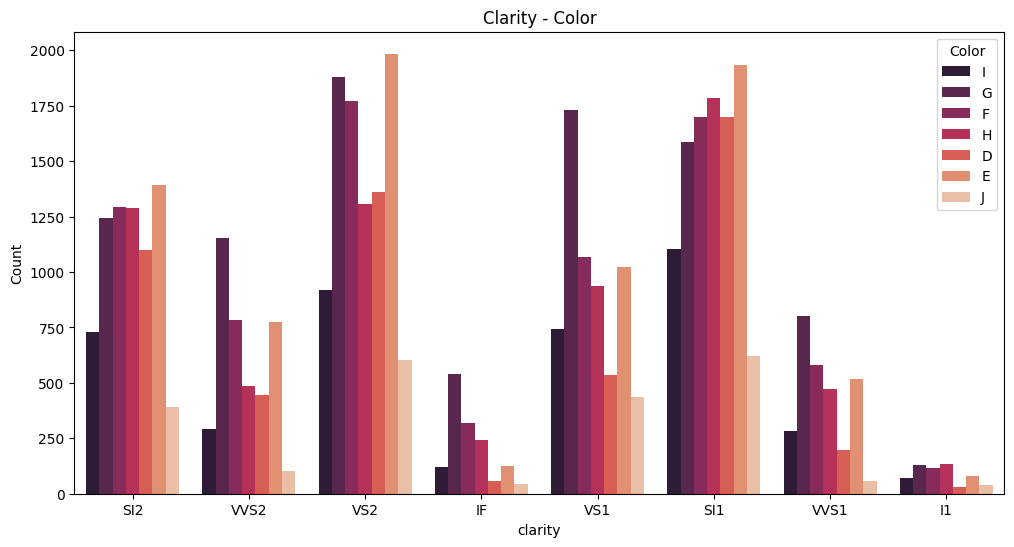

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='clarity', hue='color', palette='rocket')
plt.xlabel('clarity')
plt.ylabel('Count')
plt.title('Clarity - Color')
plt.legend(title='Color')
plt.show()

<ipython-input-203-8c07149c5efd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["color"], palette='rocket')


<Axes: xlabel='count', ylabel='color'>

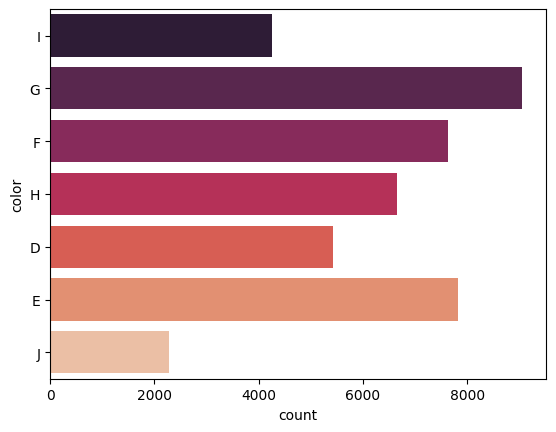

In [ ]:
sns.countplot(df["color"], palette='rocket')

In [ ]:
df["color"].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

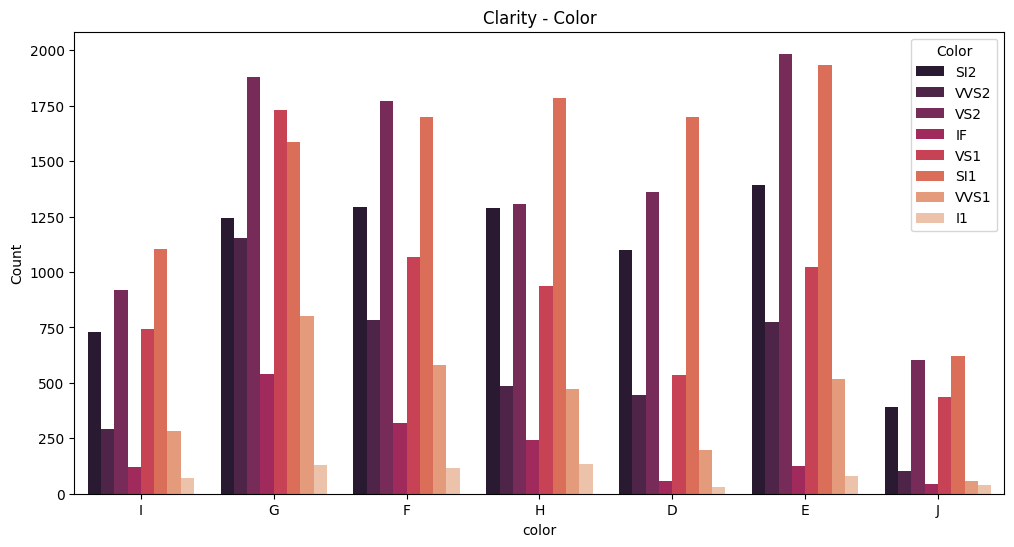

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='color', hue='clarity', palette='rocket')
plt.xlabel('color')
plt.ylabel('Count')
plt.title('Clarity - Color')
plt.legend(title='Color')
plt.show()

# **Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
x=clean_df[['x','y','z','depth','table','carat']]
y= clean_df[['price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
train=df.drop(['cut','color','clarity'],axis=1)
test=df_test.drop(['cut','color','clarity'],axis=1)
X=train.drop('price',axis=1)
y=train['price']

In [ ]:
def display_statistocs_score(score):
  print("score",score)
  print("mean",score.mean())
  print("standard deviation",score.std())

# Decision Tree Regressor model

In [ ]:
treereg=DecisionTreeRegressor()
treereg=treereg.fit(X,y)

In [ ]:
Diamondprediction_tree=treereg.predict(X)
Tree_RMSE=mean_squared_error(y,Diamondprediction_tree)
Tree_RMSE=np.sqrt(Tree_RMSE)
print("Tree_RMSE",Tree_RMSE)

Tree_RMSE 139.78514752960677


In [ ]:
score_tree=cross_val_score(treereg,X,y,scoring="neg_mean_squared_error",cv=10)
treerreg_RMSE=np.sqrt(-score_tree)
display_statistocs_score(treerreg_RMSE)

score [1870.84560092 1903.26422862 1881.05383384 1878.62989965 1943.67433492
 1860.56723188 1891.612165   1821.02056135 1830.44563423 1934.0995304 ]
mean 1881.5213020816257
standard deviation 37.46029339840479


# Linear Regression model

In [ ]:
linreg=LinearRegression()
linreg=linreg.fit(X,y)

In [ ]:
Diamondprediction_linear=linreg.predict(X)
lin_RMSE=mean_squared_error(y,Diamondprediction_linear)
lin_RMSE=np.sqrt(lin_RMSE)
print("Linear_RMSE",lin_RMSE)

Linear_RMSE 1572.8835954390756


In [ ]:
score_linear=cross_val_score(linreg,X,y,scoring="neg_mean_squared_error",cv=10)
linearreg_RMSE=np.sqrt(-score_linear)
display_statistocs_score(linearreg_RMSE)

score [1664.6693779  1619.86273558 1540.64555454 1507.91680175 1562.39080124
 1831.84456822 1506.30701799 1500.38922133 1524.97257455 1683.07298848]
mean 1594.207164159176
standard deviation 101.31171036114243


# Random Forest Model

In [ ]:
forestreg=RandomForestRegressor()
forestreg.fit(X,y)

In [ ]:
Diamondpredict_forest=forestreg.predict(X)
forestreg_RMSE=mean_squared_error(y,Diamondpredict_forest)
forestreg_RMSE=np.sqrt(forestreg_RMSE)
print("Forest_RMSE",forestreg_RMSE)

Forest_RMSE 525.9361847768965


In [ ]:
score_forest=cross_val_score(forestreg,X,y,scoring="neg_mean_squared_error",cv=10)
forestreg_RMSE=np.sqrt(-score_forest)
display_statistocs_score(forestreg_RMSE)

score [1405.34373867 1390.55226215 1361.22904883 1364.69342312 1401.63264066
 1392.37494185 1372.54836366 1350.41506201 1370.17324107 1396.52661638]
mean 1380.548933839761
standard deviation 18.052373678439476


# Lowest RMSE : Decision Tree


In [ ]:
price=treereg.predict(test.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

In [ ]:
model=pd.DataFrame(Diamondprediction_tree)
model

,0
0,4270.0
1,15164.0
2,828.0
3,1577.0
4,2596.0
...,...
43147,1760.0
43148,3016.0
43149,990.0
43150,734.0


In [ ]:
data=model.rename(columns={0: 'price', ' ':'Id'})

In [ ]:
data

,price
0,4270.0
1,15164.0
2,828.0
3,1577.0
4,2596.0
...,...
43147,1760.0
43148,3016.0
43149,990.0
43150,734.0


In [ ]:
data["price"].mean()

6748.135428253615

In [ ]:
data.columns

Index(['price'], dtype='object')

In [ ]:
import joblib
joblib.dump(forestreg_RMSE, "myfirstmodel.pkl")
loading_my_model = joblib.load("myfirstmodel.pkl")

In [ ]:
joblib.dump(lin_RMSE, "myfirstmodel.pkl")
loading_my_model = joblib.load("myfirstmodel.pkl")

In [ ]:
joblib.dump(RMSE_tree_score, "myfirstmodel.pkl")
loading_my_model = joblib.load("myfirstmodel.pkl")